In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

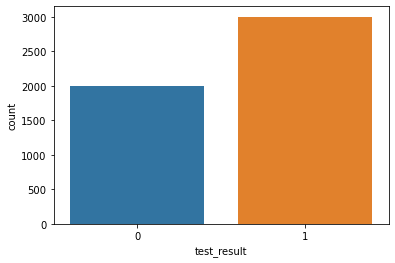

In [7]:
sns.countplot(df['test_result'])

<AxesSubplot:xlabel='test_result', ylabel='count'>

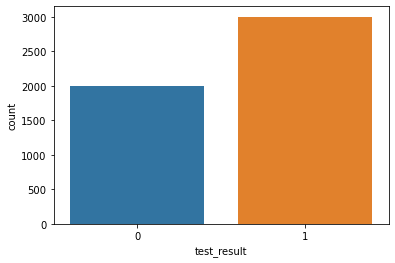

In [8]:
sns.countplot(data=df, x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

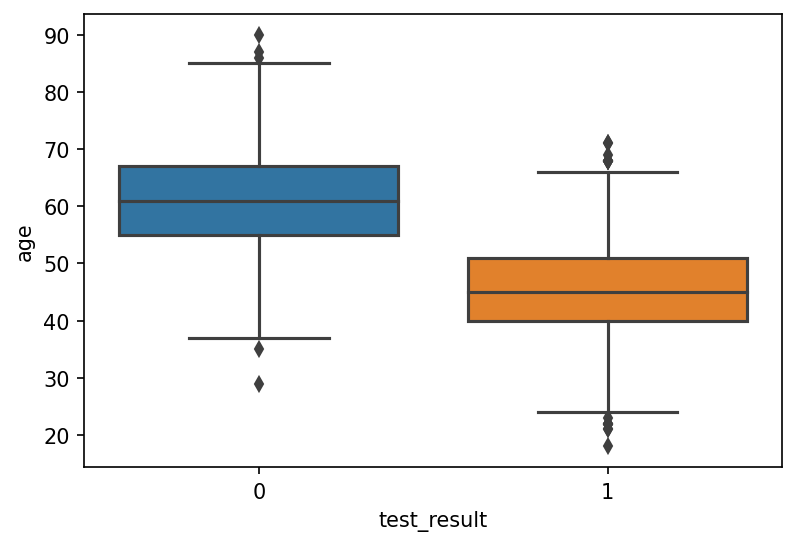

In [10]:
plt.figure(dpi=150)
sns.boxplot(x='test_result', y='age', data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

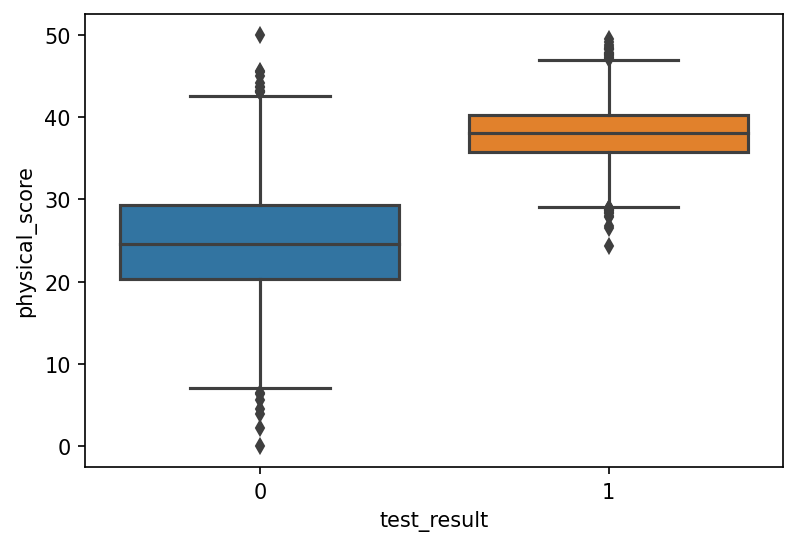

In [12]:
plt.figure(dpi=150)
sns.boxplot(x='test_result', y='physical_score', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

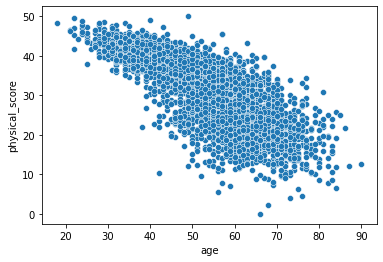

In [14]:
sns.scatterplot(x='age', y='physical_score', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

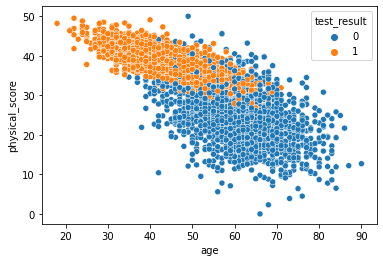

In [15]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

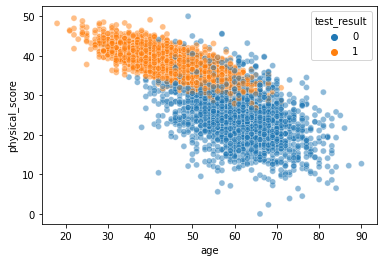

In [16]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5)

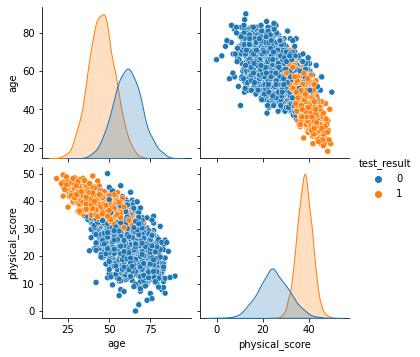

In [21]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

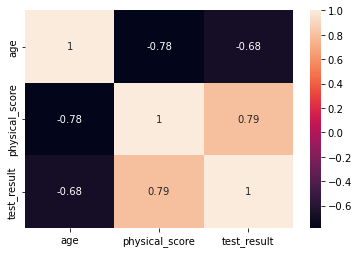

In [19]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

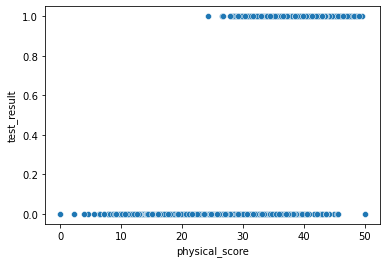

In [22]:
sns.scatterplot(x='physical_score', y= 'test_result', data =df)

In [24]:
from mpl_toolkits.mplot3d import Axes3D

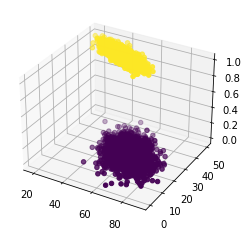

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'],df['test_result'], c=df['test_result'])

In [59]:
X = df.drop('test_result',axis=1)

In [60]:
y = df['test_result']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [64]:
scaler = StandardScaler()

In [65]:
scaled_X_train = scaler.fit_transform(X_train)

In [66]:
scaled_X_test = scaler.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_model = LogisticRegression()

In [69]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [70]:
log_model.coef_

array([[-0.88637483,  3.44637017]])

In [71]:
y_pred = log_model.predict(scaled_X_test)

In [72]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [73]:
y_pred = log_model.predict_proba(scaled_X_test)

In [74]:
y_pred

array([[0.02528772, 0.97471228],
       [0.0276414 , 0.9723586 ],
       [0.98859823, 0.01140177],
       ...,
       [0.99348084, 0.00651916],
       [0.99893175, 0.00106825],
       [0.03882928, 0.96117072]])

In [75]:
log_model.coef_

array([[-0.88637483,  3.44637017]])

In [76]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [82]:
y_pred = log_model.predict(scaled_X_test)

In [84]:
accuracy_score(y_test,y_pred)


0.9176

In [85]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [87]:
confusion_matrix(y_test,y_pred)

array([[427,  71],
       [ 32, 720]])

In [89]:
from sklearn.metrics import plot_confusion_matrix

/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


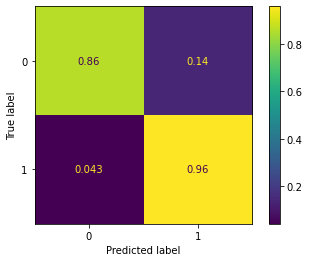

In [93]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [94]:
len(y_test)

1250

In [96]:
print(classification_report(y_test,y_perd))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       498
           1       0.91      0.96      0.93       752

    accuracy                           0.92      1250
   macro avg       0.92      0.91      0.91      1250
weighted avg       0.92      0.92      0.92      1250



In [98]:
from sklearn.metrics import precision_score,recall_score

In [99]:
precision_score(y_test,y_pred)

0.9102402022756005

In [100]:
recall_score(y_test,y_pred)

0.9574468085106383

In [101]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


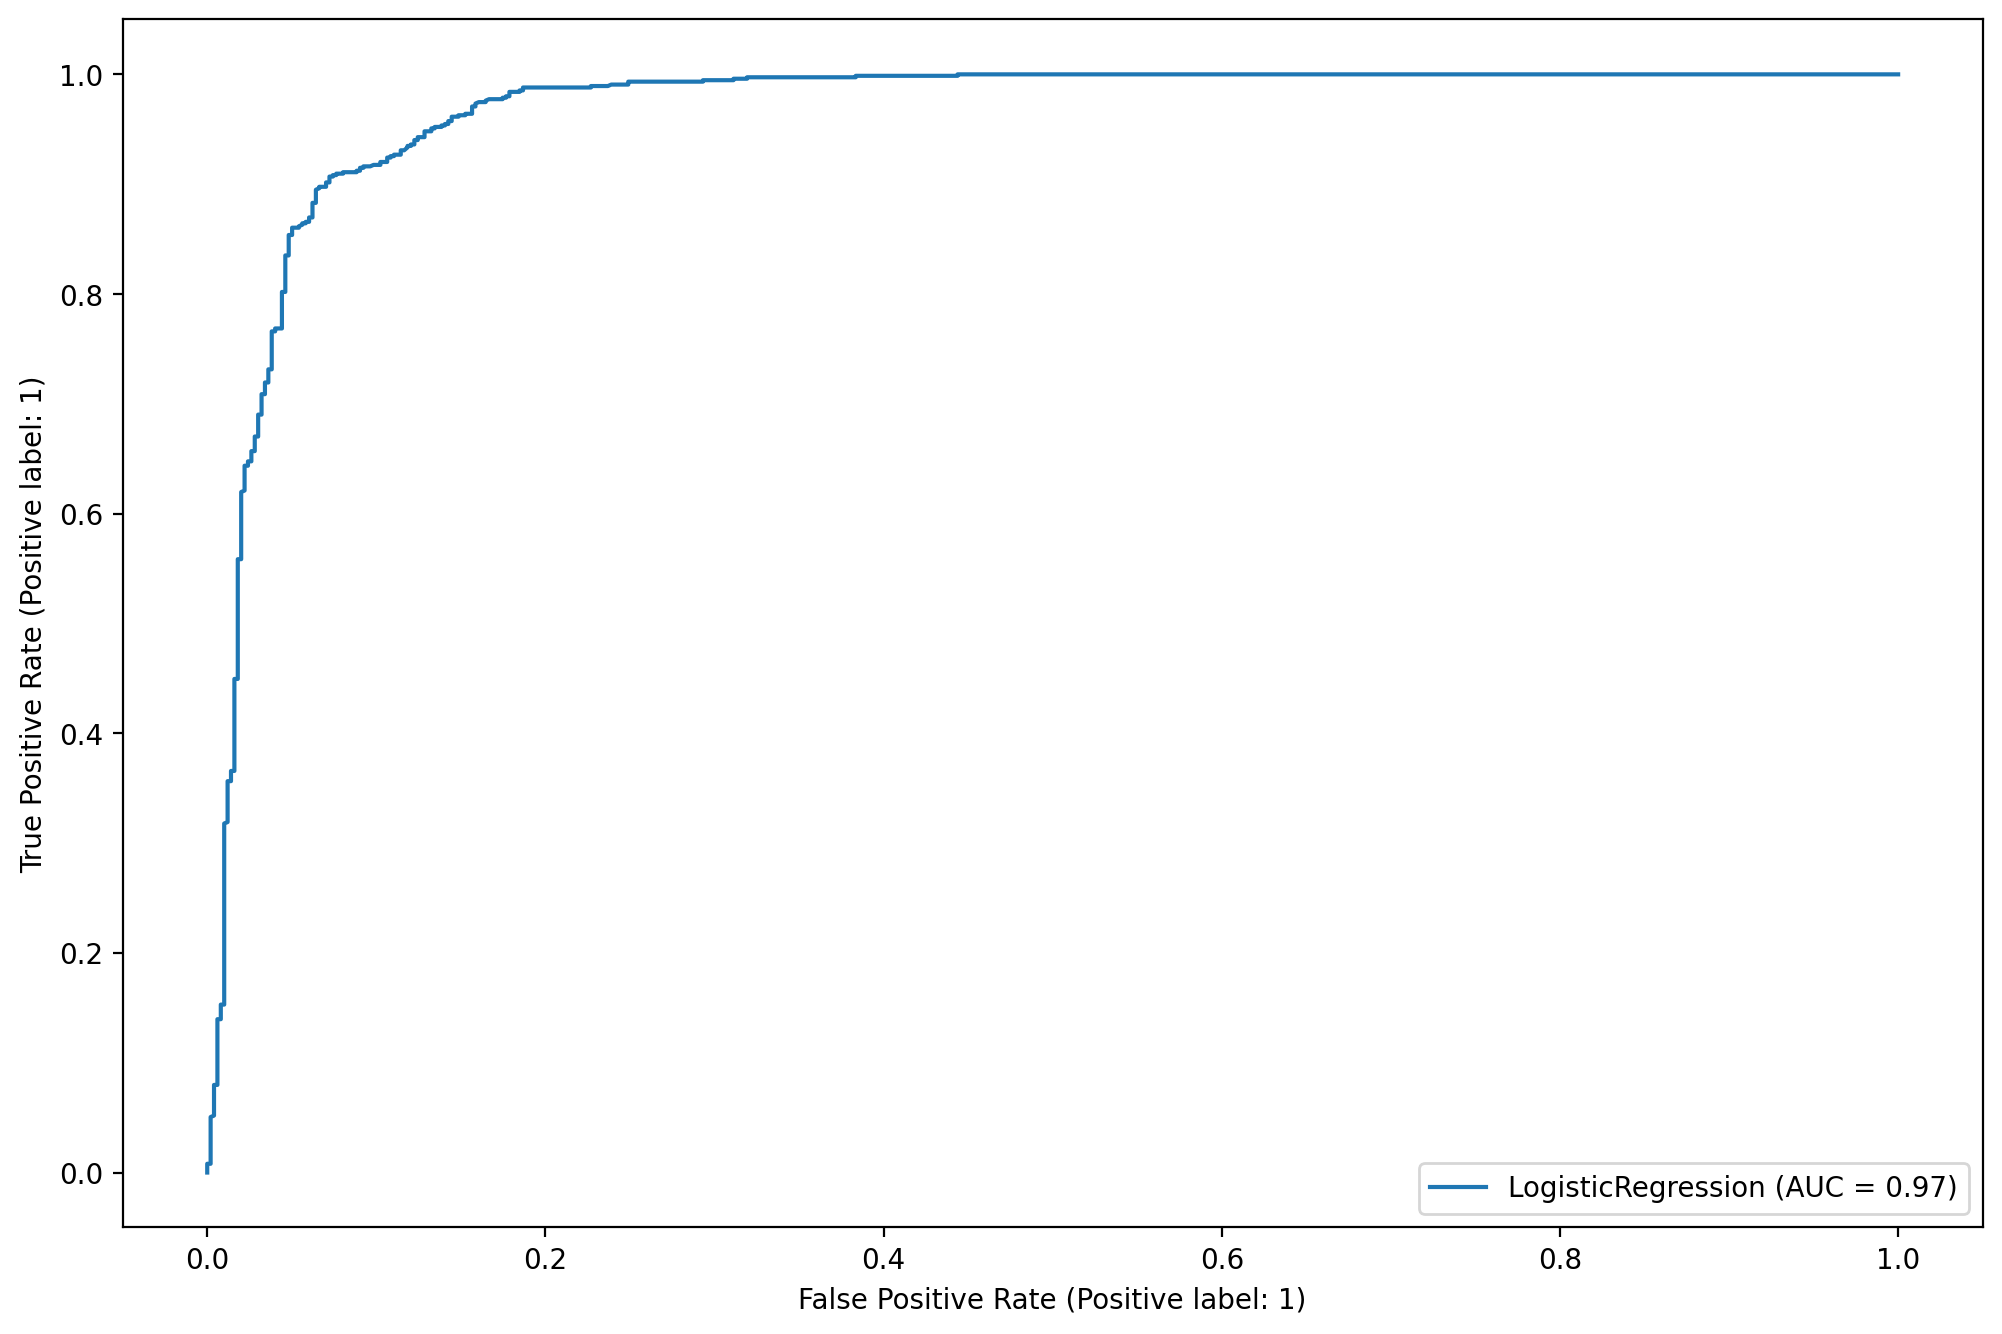

In [106]:
fig,ax = plt.subplots(figsize=(12,8), dpi=200)
plot_roc_curve(log_model,scaled_X_test,y_test,ax= ax)

/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


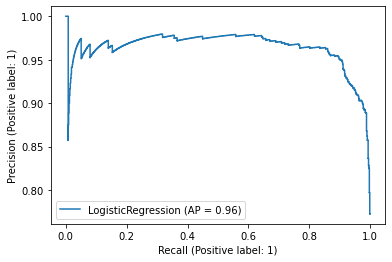

In [107]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [109]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02528772, 0.97471228])

In [111]:
log_model.predict(scaled_X_test)[0]

1

In [110]:
y_test[0]

1

In [112]:
df = pd.read_csv('../DATA/iris.csv')

In [113]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [115]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [116]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

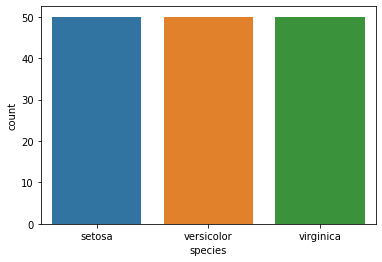

In [117]:
sns.countplot(x='species',data=df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

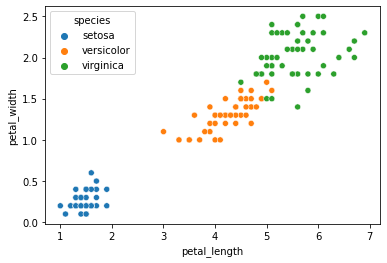

In [119]:
sns.scatterplot(x='petal_length', y='petal_width',data=df, hue='species')

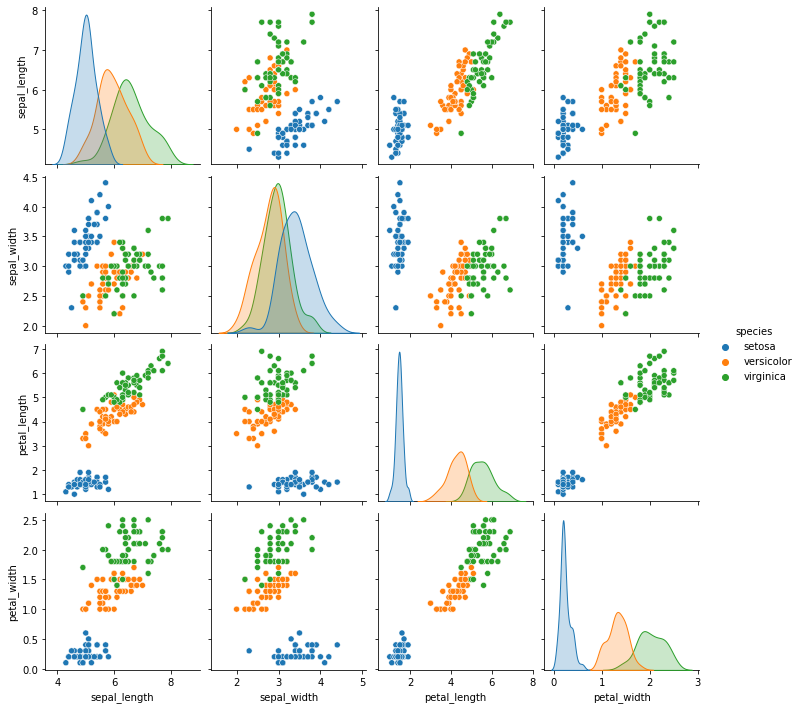

In [120]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

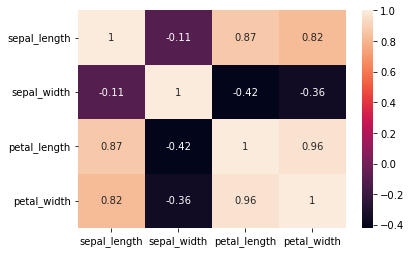

In [121]:
sns.heatmap(df.corr(),annot=True)

In [122]:
X = df.drop('species',axis=1)

In [123]:
y = df['species']

In [124]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [128]:
scaler = StandardScaler()

In [129]:
scaled_X_train = scaler.fit_transform(X_train)

In [130]:
scaled_X_test = scaler.transform(X_test)

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
from sklearn.model_selection import GridSearchCV

In [134]:
log_model = LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

In [138]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty':penalty, 'l1_ratio':l1_ratio,'C':C}

In [139]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [140]:
grid_model.fit(scaled_X_train,y_train)

/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [141]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [142]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [143]:
y_pred = grid_model.predict(scaled_X_test)

In [144]:
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [145]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [146]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

/Users/miglenaruskova/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


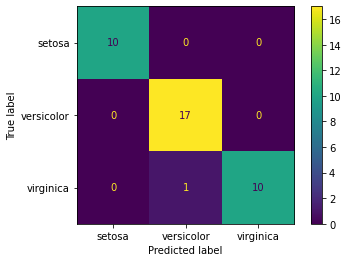

In [147]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [149]:
from sklearn.metrics import roc_curve, auc

In [150]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

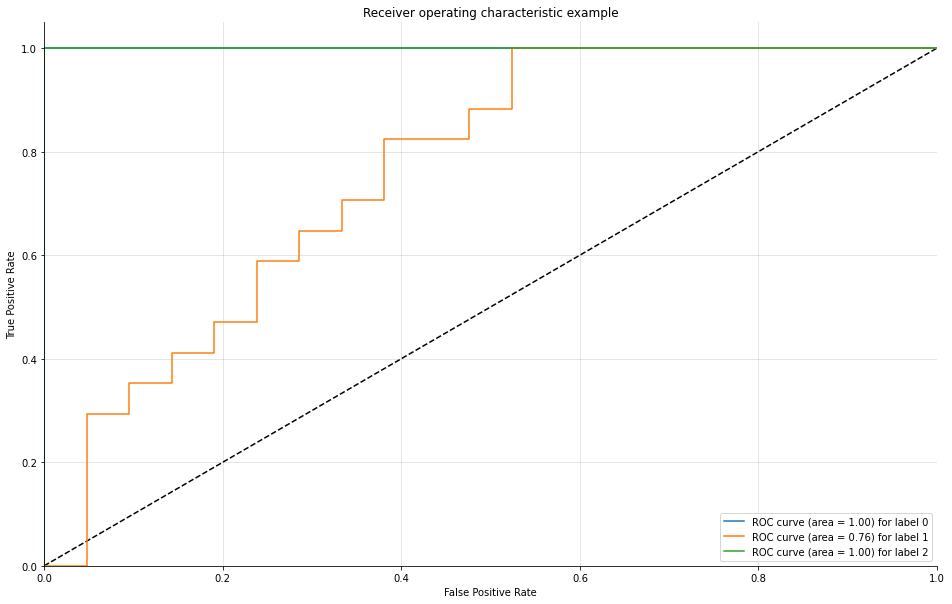

In [151]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))